In [1]:
import numpy as np
import xarray as xr
import regionate

import cmocean
import matplotlib.pyplot as plt

In [2]:
wmt = xr.open_dataset('../paper/data/baltic_wmb_natv_hourly_for_decompositions.nc')
wmt_newbins = xr.open_dataset('../paper/data/baltic_wmb_natv_hourly_for_decompositions_newbins.nc')
wmt_maps = xr.open_dataset("../paper/data/baltic_wmb_natv_hourly_maps.nc")
transport = xr.open_dataset("../paper/data/baltic_wmb_natv_hourly_boundary_transport.nc")

thetao0 = wmt_maps.thetao_l_target.values

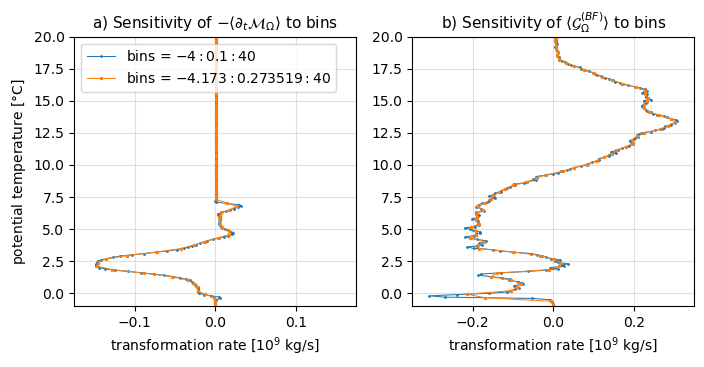

In [3]:
plt.figure(figsize=(8,3.5))

plt.subplot(1,2,1)
(wmt['mass_tendency']*1e-9).mean('time').plot(y="thetao_l_target", label=r"bins = $-4:0.1:40$", marker=".", ls="-", lw=0.75, markersize=2)
(wmt_newbins['mass_tendency']*1e-9).mean('time').plot(y="thetao_l_target", label=r"bins = $-4.173:0.273519:40$", marker=".", ls="-", lw=0.75, markersize=3)
plt.grid(True, alpha=0.4)
plt.ylim(-1, 20)
plt.xlim(-0.175, 0.175)
plt.ylabel("")
plt.xlabel(r"transformation rate [$10^{9}$ kg/s]")
plt.legend(loc="upper left")
plt.ylabel(r"potential temperature [$\degree$C]")
plt.title(r"a) Sensitivity of $-\langle \partial_{t} \mathcal{M}_{\Omega} \rangle$ to bins", fontsize=11)

plt.subplot(1,2,2)
(wmt['boundary_fluxes']*1e-9).mean('time').plot(y="thetao_l_target", label=r"bins = $-4:0.1:40$", marker=".", ls="-", lw=0.75, markersize=2)
(wmt_newbins['boundary_fluxes']*1e-9).mean('time').plot(y="thetao_l_target", label=r"bins = $-4.173:0.273519:40$", marker=".", ls="-", lw=0.75, markersize=3)
plt.grid(True, alpha=0.4)
plt.ylim(-1, 20)
plt.xlim(-0.35, 0.35)
plt.ylabel("")
plt.xlabel(r"transformation rate [$10^{9}$ kg/s]")
plt.title(r"b) Sensitivity of $\langle \mathcal{G}^{(BF)}_{\Omega} \rangle$ to bins", fontsize=11);

plt.savefig("figures/lambda_bin_sensitivity.png", bbox_inches="tight", dpi=250)

/vftmp/Henri.Drake/pid1250/ipykernel_14291/2981681679.py:23: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar(pc2, label="")
/vftmp/Henri.Drake/pid1250/ipykernel_14291/2981681679.py:24: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar(pc1, label="depth [m]")


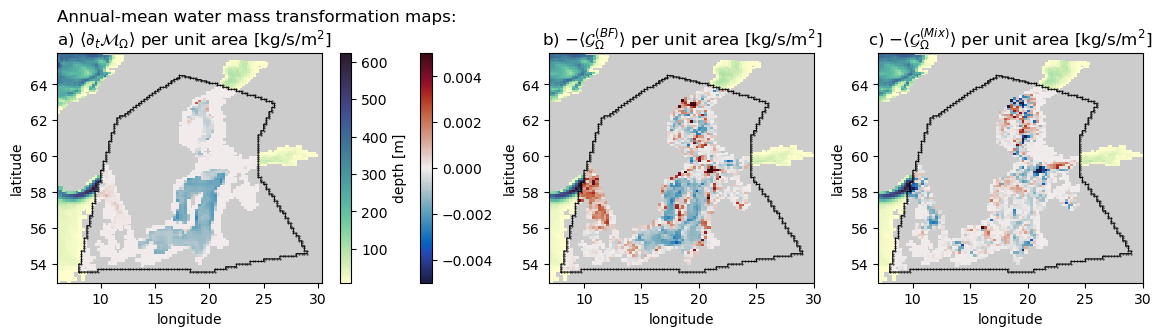

In [4]:
cmap = cmocean.cm.deep.copy()
cmap.set_bad((0.8, 0.8, 0.8, 1))

div_cmap = cmocean.cm.balance.copy()
div_cmap.set_bad((0.6, 0.6, 0.6, 1))

fig = plt.figure(figsize=(11.5,3.25), layout="constrained")
spec = fig.add_gridspec(1, 12)

ax = fig.add_subplot(spec[0, 0:4], facecolor=cmap.get_bad())
pc1 = ax.pcolor(
    wmt_maps.geolon_c,
    wmt_maps.geolat_c,
    wmt_maps.deptho.where(~wmt_maps.mask, np.nan),
    cmap=cmap
)
pc2 = ax.pcolor(
    wmt_maps.geolon_c,
    wmt_maps.geolat_c,
    wmt_maps.dmdt.where(wmt_maps.mask & (~np.isnan(wmt_maps.deptho)), np.nan).mean('time'),
    vmin=-0.005, vmax=0.005, cmap=div_cmap
)
plt.colorbar(pc2, label="")
plt.colorbar(pc1, label="depth [m]")
plt.plot(regionate.loop(transport.region_lons), regionate.loop(transport.region_lats), color="k", linewidth=0.6, markersize=0.8, marker=".")
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.title(
    r"Annual-mean water mass transformation maps:"
    "\n"
    r"a) $\langle \partial_{t} \mathcal{M}_{\Omega} \rangle$ per unit area [kg/s/m$^{2}$]",
    loc="left"
)

ax = fig.add_subplot(spec[0, 4:8], facecolor=cmap.get_bad())
pc = ax.pcolor(
    wmt_maps.geolon_c,
    wmt_maps.geolat_c,
    (-wmt_maps.GBC).where(wmt_maps.mask & (~np.isnan(wmt_maps.deptho)), np.nan).mean('time'),
    vmin=-0.005, vmax=0.005, cmap=div_cmap
)
ax.pcolor(
    wmt_maps.geolon_c,
    wmt_maps.geolat_c,
    wmt_maps.deptho.where(~wmt_maps.mask, np.nan),
    cmap=cmap
)
plt.plot(regionate.loop(transport.region_lons), regionate.loop(transport.region_lats), color="k", linewidth=0.6, markersize=0.8, marker=".")
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.title(r"b) $-\langle \mathcal{G}^{(BF)}_{\Omega} \rangle$ per unit area [kg/s/m$^{2}$]", loc="center")
plt.xlim(7,30)

ax = fig.add_subplot(spec[0, 8:], facecolor=cmap.get_bad())
pc = ax.pcolor(
    wmt_maps.geolon_c,
    wmt_maps.geolat_c,
    (-wmt_maps.Gmix).where(wmt_maps.mask & (~np.isnan(wmt_maps.deptho)), np.nan).mean('time'),
    vmin=-0.005, vmax=0.005, cmap=div_cmap
)
ax.pcolor(
    wmt_maps.geolon_c,
    wmt_maps.geolat_c,
    wmt_maps.deptho.where(~wmt_maps.mask, np.nan),
    cmap=cmap
)
plt.plot(regionate.loop(transport.region_lons), regionate.loop(transport.region_lats), color="k", linewidth=0.6, markersize=0.8, marker=".")
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.title(r"c) $-\langle\mathcal{G}^{(Mix)}_{\Omega}\rangle$ per unit area [kg/s/m$^{2}$]", loc="center")
plt.xlim(7,30)

plt.savefig("figures/transformation_maps.png", bbox_inches="tight", dpi=250)

/vftmp/Henri.Drake/pid1250/ipykernel_14291/1552277186.py:16: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar(label="seafloor depth [m]")


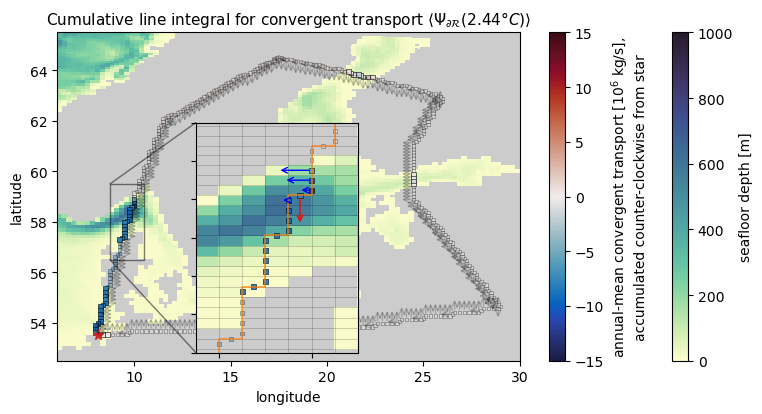

In [5]:
import cmocean

deep_cmap = cmocean.cm.deep.copy()
deep_cmap.set_bad((0.8, 0.8, 0.8))

fig, ax = plt.subplots(figsize=(8, 4.25))
ax.set_facecolor(deep_cmap.get_bad())
plt.pcolor(
    wmt_maps.geolon_c,
    wmt_maps.geolat_c,
    wmt_maps.deptho.where(wmt_maps.deptho!=0.),
    cmap=deep_cmap,
    vmin = 0,
    vmax = 1000
)
plt.colorbar(label="seafloor depth [m]")
for p in transport.convergent_transport:
    plt.annotate(
        text="",
        xy=(p.lon_sect.values +p.sign.values*(p.dir.values=="U")*1.5*0.5, p.lat_sect.values +p.sign.values*(p.dir.values=="V")*1.5*0.4),
        xytext=(p.lon_sect.values, p.lat_sect.values),
        arrowprops=dict(arrowstyle="->", facecolor='black', alpha=0.2)
    )

sc = plt.scatter(
    transport.convergent_transport.lon_sect,
    transport.convergent_transport.lat_sect,
    c = ((transport.convergent_transport.cumsum("sect")
         .where(transport.convergent_transport_mask==0.)))*1e-6,
    marker="s",
    s = 6,
    cmap=cmocean.cm.balance,
    vmin = -15,
    vmax = 15,
    edgecolor="k",
    linewidth=0.5,
    alpha=0.4
)
sc = plt.scatter(
    transport.convergent_transport.lon_sect,
    transport.convergent_transport.lat_sect,
    c = ((transport.convergent_transport.cumsum("sect")
         .where(transport.convergent_transport_mask!=0.)))*1e-6,
    marker="s",
    s = 11,
    cmap=cmocean.cm.balance,
    vmin = -15,
    vmax = 15,
    edgecolor="k",
    linewidth=0.4,
)

plt.plot(
    transport.convergent_transport.lon_sect[0],
    transport.convergent_transport.lat_sect[0],
    "C3*",
    markersize=8
)

plt.colorbar(sc, label="annual-mean convergent transport [$10^{6}$ kg/s],\n"+r"accumulated counter-clockwise from star")
plt.xlim(6,30)
plt.ylim(52.5, 65.5)
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.title(r"Cumulative line integral for convergent transport $\langle \Psi_{\partial \mathcal{R}} (2.44 \degree C) \rangle$", fontsize=11);

###
# inset axes
x1, x2, y1, y2 = 8.75, 10.5, 56.5, 59.5
axins = ax.inset_axes(
    [0.3, 0.025, 0.35, 0.7],
    xlim=(x1,x2), ylim=(y1,y2), xticklabels=[], yticklabels=[]
)
axins.pcolor(
    wmt_maps.geolon_c,
    wmt_maps.geolat_c,
    wmt_maps.deptho.where(wmt_maps.deptho!=0.),
    cmap=deep_cmap,
    vmin = 0,
    vmax = 1000
)
for xq in wmt_maps.xq:
    axins.plot(
        wmt_maps.geolon_c.sel(xq=xq),
        wmt_maps.geolat_c.sel(xq=xq),
        color="k", alpha=0.25, lw=0.5
    )
for yq in wmt_maps.yq:
    axins.plot(
        wmt_maps.geolon_c.sel(yq=yq),
        wmt_maps.geolat_c.sel(yq=yq),
        color="k", alpha=0.25, lw=0.5
    )
axins.plot(transport.region_lons, transport.region_lats, "C1-", lw=1.25, alpha=0.75)

trans_max = np.abs(transport.convergent_transport).max()
for p in transport.convergent_transport:
    scale = p/trans_max
    color = "r" if p>0 else "b"
    if np.abs(scale) > 0.1:
        axins.annotate(
            text="",
            xy=(p.lon_sect.values +scale*p.sign.values*(p.dir.values=="U")*1.75*0.6*0.35, p.lat_sect.values +scale*p.sign.values*(p.dir.values=="V")*1.75*0.4*0.7),
            xytext=(p.lon_sect.values, p.lat_sect.values),
            arrowprops=dict(arrowstyle="->", color=color, alpha=1)
        )

sc = axins.scatter(
    transport.convergent_transport.lon_sect,
    transport.convergent_transport.lat_sect,
    c = ((transport.convergent_transport.cumsum("sect")
         .where(transport.convergent_transport_mask==0.)))*1e-6,
    marker="s",
    s = 8,
    cmap=cmocean.cm.balance,
    vmin = -15,
    vmax = 15,
    edgecolor="k",
    linewidth=0.5,
    alpha=0.4
)
sc = axins.scatter(
    transport.convergent_transport.lon_sect,
    transport.convergent_transport.lat_sect,
    c = ((transport.convergent_transport.cumsum("sect")
         .where(transport.convergent_transport_mask!=0.)))*1e-6,
    marker="s",
    s = 14,
    cmap=cmocean.cm.balance,
    vmin = -15,
    vmax = 15,
    edgecolor="k",
    linewidth=0.4,
)
axins.set_facecolor(deep_cmap.get_bad())
ax.indicate_inset_zoom(axins, edgecolor="black")

##
plt.tight_layout();
plt.savefig("figures/convergent_mass_transport.png", bbox_inches="tight", dpi=300)